In [ ]:
indic model 
https://huggingface.co/ai4bharat/indic-bert/blob/09d164af42b5b1e1fc0f8fd60c5de394cb340bae/README.md
https://github.com/AI4Bharat/indic-bert

In [ ]:
!pip install transformers==3

     |████████████████████████████████| 757kB 5.6MB/s 
     |████████████████████████████████| 3.0MB 7.4MB/s 
     |████████████████████████████████| 901kB 35.2MB/s 
     |████████████████████████████████| 1.2MB 36.2MB/s 


In [ ]:
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup

import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F


import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from tqdm import tqdm


%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 23
np.random.seed(RANDOM_SEED)

torch.manual_seed(RANDOM_SEED)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
import csv
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BasicTokenizer
from transformers import TFBertModel, TFBertPreTrainedModel, TFBertForSequenceClassification
from transformers import glue_convert_examples_to_features, InputExample

In [ ]:
!pip freeze > requirements.txt

In [ ]:
data_train = pd.read_csv('/content/full_hin.csv')
data_train.head()

Unnamed: 0                                               Text  label
0           0  Bollywood film dekhne ke samay logic ghar mein...      0
1           1                                   Chutiya movie...      0
2           2       Amrit Anand अब तो जुड़े ही है उनको बोलो जुड़ने      0
3           3  @Pankaj Chauhan abey tum jse aadmiyo ko ye lgt...      0
4           4                 bro house of card ka review karona      0

In [ ]:
data_test = pd.read_csv('/content/trac2_hin_dev.csv')

In [ ]:
data_test.head()

ID  ... Sub-task B
0    C38.9  ...       NGEN
1  C4.1510  ...       NGEN
2   C19.95  ...       NGEN
3   C4.281  ...       NGEN
4   C4.216  ...       NGEN

[5 rows x 4 columns]

In [ ]:
#data.drop(['ID','Sub-task B'], axis=1, inplace=True)
data_test.drop(['ID','Sub-task B'], axis=1, inplace=True)




In [ ]:
#NAG_train = data[(data['Sub-task A']=='NAG')]
#OAG_train = data[(data['Sub-task A']=='CAG')]
#CAG_train = data[(data['Sub-task A']=='OAG')]

In [ ]:
NAG_test = data_test[(data_test['Sub-task A']=='NAG')]
OAG_test= data_test[(data_test['Sub-task A']=='CAG')]
CAG_test = data_test[(data_test['Sub-task A']=='OAG')]

In [ ]:
import warnings as wrn
wrn.filterwarnings('ignore')

#NAG_train["Sub-task A"] = 0 


#OAG_train["Sub-task A"] = 1


#CAG_train["Sub-task A"] = 2


#NAG_train.head()

In [ ]:
import warnings as wrn
wrn.filterwarnings('ignore')

NAG_test["Sub-task A"] = 0 
#negatives_test["Sentiment"] = 0

OAG_test["Sub-task A"] = 1
#positives_test["Sentiment"] = 2

CAG_test["Sub-task A"] = 2
#neutrals_test["Sentiment"] = 1

NAG_test.head()

Text  Sub-task A
1   Bhaiya shaadi mein zaroor aana movie ka plot j...           0
2   Section 375 hai kya??? .... Ye to batate kam s...           0
4              Maine itni kam dislike kbhi nhii dekhi           0
7   जिश देश मे super30 जैसी फ़िल्म फ्लॉप ओर कबीर सि...           0
11            Bhai movie review 5 se 7 mins Bano yaar           0

In [ ]:
#data_train = pd.concat([NAG_train,
 #                 OAG_train,
 #                 CAG_train
 #                ],axis=0)

#data_train.reset_index(inplace=True)

In [ ]:
data_test = pd.concat([NAG_test,
                  OAG_test,
                  CAG_test
                 ],axis=0)

data_test.reset_index(inplace=True)

In [ ]:
#data_train = data_train.rename(columns = {'Sub-task A': 'label'}, inplace = False)
data_test = data_test.rename(columns = {'Sub-task A': 'label'}, inplace = False)


In [ ]:
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased', do_lower_case=False)

sample_txt = 'I am gay boy plese love me any hot top i love hot boys'

tokens = tokenizer.tokenize(sample_txt)

token_ids = tokenizer.convert_tokens_to_ids(tokens)

print(f' Sentence: {sample_txt}')
print(f'   Tokens: {tokens}')
print(f'Token IDs: {token_ids}')


 Sentence: I am gay boy plese love me any hot top i love hot boys
   Tokens: ['I', 'am', 'gay', 'boy', 'pl', '##ese', 'love', 'me', 'any', 'hot', 'top', 'i', 'love', 'hot', 'boys']
Token IDs: [146, 10392, 29435, 26905, 20648, 13565, 16138, 10911, 11178, 29698, 12364, 177, 16138, 29698, 32647]


In [ ]:
class_names = ['NAG', 'OAG', 'CAG']

In [ ]:
encoding = tokenizer.encode_plus(
  sample_txt,
  max_length=32,
  add_special_tokens=True, # Add '[CLS]' and '[SEP]'
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',  # Return PyTorch tensors
)
encoding.keys()


dict_keys(['input_ids', 'attention_mask'])

In [ ]:
print(len(encoding['input_ids'][0]))
encoding['input_ids'][0]

32


tensor([  101,   146, 10392, 29435, 26905, 20648, 13565, 16138, 10911, 11178,
        29698, 12364,   177, 16138, 29698, 32647,   102,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0])

In [ ]:
print(len(encoding['attention_mask'][0]))
encoding['attention_mask']

32


tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
class GPDataset(Dataset):
  def __init__(self, comments, targets, tokenizer, max_len):
    self.comments = comments
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  def __len__(self):
    return len(self.comments)
  def __getitem__(self, item):
    comment = str(self.comments[item])
    target = self.targets[item]
    encoding = self.tokenizer.encode_plus(
      comment,
      add_special_tokens=True,
      max_length=self.max_len,
      return_token_type_ids=False,
      pad_to_max_length=True,
      return_attention_mask=True,
      return_tensors='pt',
    )
    return {
      'comment_text': comment,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
df_train, df_test = train_test_split(
  data_train,
  test_size=0.1,
  random_state=RANDOM_SEED
)
df_val, df_test = train_test_split(
  df_test,
  test_size=0.5,
  random_state=RANDOM_SEED
)

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((6796, 3), (378, 3), (378, 3))

In [ ]:
MAX_LEN = 160

In [ ]:
import logging
logging.basicConfig(level=logging.ERROR)

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = GPDataset(
    comments=df.Text.to_numpy(),
    targets=df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )
  return DataLoader(
    ds,
    batch_size=batch_size,
    num_workers=4
  )
BATCH_SIZE = 16
train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(data_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['review_text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 160])
torch.Size([16, 160])
torch.Size([16])


In [ ]:
PRE_TRAINED_MODEL_NAME='bert-base-multilingual-cased'

In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
last_hidden_state, pooled_output = bert_model(
  input_ids=encoding['input_ids'],
  attention_mask=encoding['attention_mask']
)

In [ ]:
last_hidden_state.shape
torch.Size([1, 32, 768])

torch.Size([1, 32, 768])

In [ ]:
bert_model.config.hidden_size

768

In [ ]:
class Classifier(nn.Module):
  def __init__(self, n_classes):
    super(Classifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  def forward(self, input_ids, attention_mask):
    _, pooled_output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    output = self.drop(pooled_output)
    return self.out(output)

In [ ]:
model = Classifier(len(class_names))
model = model.to(device)

In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)
print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 160])
torch.Size([16, 160])


In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.3705, 0.3952, 0.2343],
        [0.3667, 0.3481, 0.2852],
        [0.4012, 0.3424, 0.2564],
        [0.3992, 0.3722, 0.2287],
        [0.4236, 0.3431, 0.2333],
        [0.3304, 0.3828, 0.2868],
        [0.4428, 0.3059, 0.2512],
        [0.4360, 0.3025, 0.2615],
        [0.3898, 0.3292, 0.2810],
        [0.3821, 0.3450, 0.2730],
        [0.3794, 0.3989, 0.2218],
        [0.3584, 0.3766, 0.2650],
        [0.3196, 0.3714, 0.3090],
        [0.3635, 0.3682, 0.2683],
        [0.3785, 0.3276, 0.2939],
        [0.3044, 0.4297, 0.2659]], device='cuda:0', grad_fn=<SoftmaxBackward>)

In [ ]:

EPOCHS = 30
optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)
loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model,
  data_loader,
  loss_fn,
  optimizer,
  device,
  scheduler,
  n_examples
):
  model = model.train()
  losses = []
  correct_predictions = 0
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)
    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)
    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())
    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()
  losses = []
  correct_predictions = 0
  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      loss = loss_fn(outputs, targets)
      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())
  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time
history = defaultdict(list)
best_accuracy = 0
for epoch in range(EPOCHS):
  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)
  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,
    loss_fn,
    optimizer,
    device,
    scheduler,
    len(df_train)
  )
  print(f'Train loss {train_loss} accuracy {train_acc}')
  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn,
    device,
    len(df_val)
  )
  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()
  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)
  if val_acc > best_accuracy:
    torch.save(model.state_dict(), 'best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/30
----------
Train loss 0.8836222172484678 accuracy 0.5757798705120659
Val   loss 0.8278975735108057 accuracy 0.6322751322751322

Epoch 2/30
----------
Train loss 0.7802276555229636 accuracy 0.6527369040612124
Val   loss 0.7277273374299208 accuracy 0.6693121693121693

Epoch 3/30
----------
Train loss 0.7177409660816193 accuracy 0.6998234255444379
Val   loss 0.6497133572896322 accuracy 0.7513227513227513

Epoch 4/30
----------
Train loss 0.643931750514928 accuracy 0.748234255444379
Val   loss 0.6893227857848009 accuracy 0.746031746031746

Epoch 5/30
----------
Train loss 0.5870199843364603 accuracy 0.7904649793996468
Val   loss 0.6818077452480793 accuracy 0.7513227513227513

Epoch 6/30
----------
Train loss 0.537800276314511 accuracy 0.8228369629193643
Val   loss 0.6716228922208151 accuracy 0.7751322751322751

Epoch 7/30
----------
Train loss 0.4786132119858966 accuracy 0.8547675103001765
Val   loss 0.7354470739761988 accuracy 0.7619047619047619

Epoch 8/30
----------
Train los

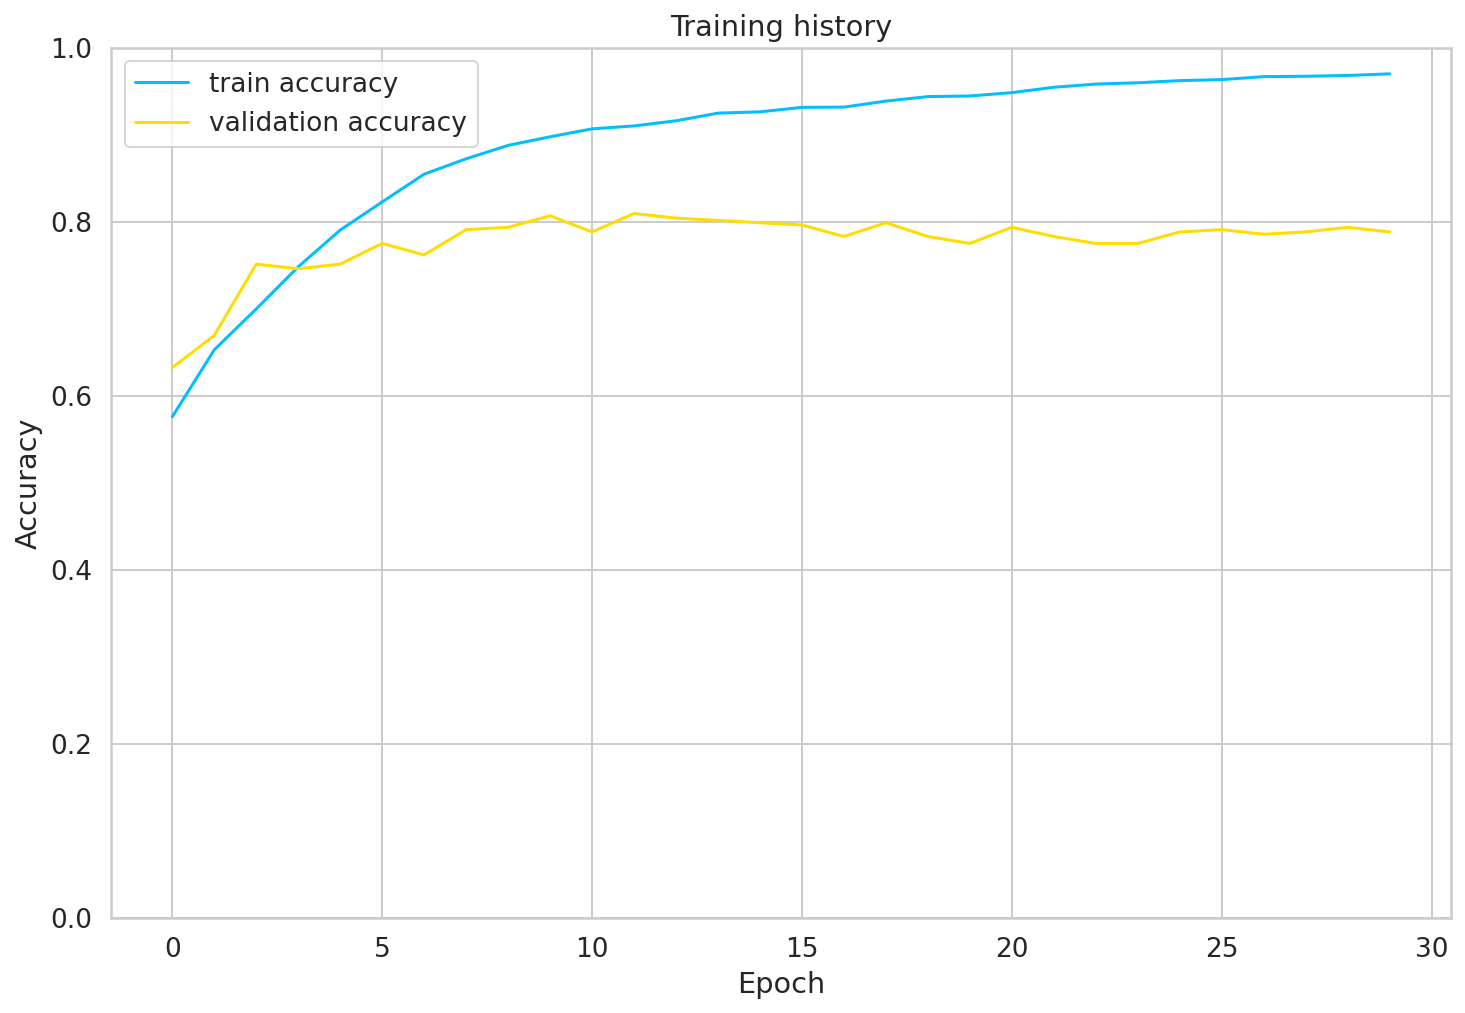

In [ ]:
plt.plot(history['train_acc'], label='train accuracy')
plt.plot(history['val_acc'], label='validation accuracy')
plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
test_acc, _ = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)
test_acc.item()

1.7936507936507935

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  aggr_texts = []
  predictions = []
  prediction_probs = []
  real_values = []
  with torch.no_grad():
    for d in data_loader:
      texts = d["comment_text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)
      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)
      aggr_texts.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(outputs)
      real_values.extend(targets)
  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return aggr_texts, predictions, prediction_probs, real_values

In [ ]:
y_comment_texts, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

         NAG       0.82      0.77      0.79       578
         OAG       0.45      0.49      0.47       211
         CAG       0.59      0.62      0.60       208

    accuracy                           0.68       997
   macro avg       0.62      0.63      0.62       997
weighted avg       0.69      0.68      0.68       997



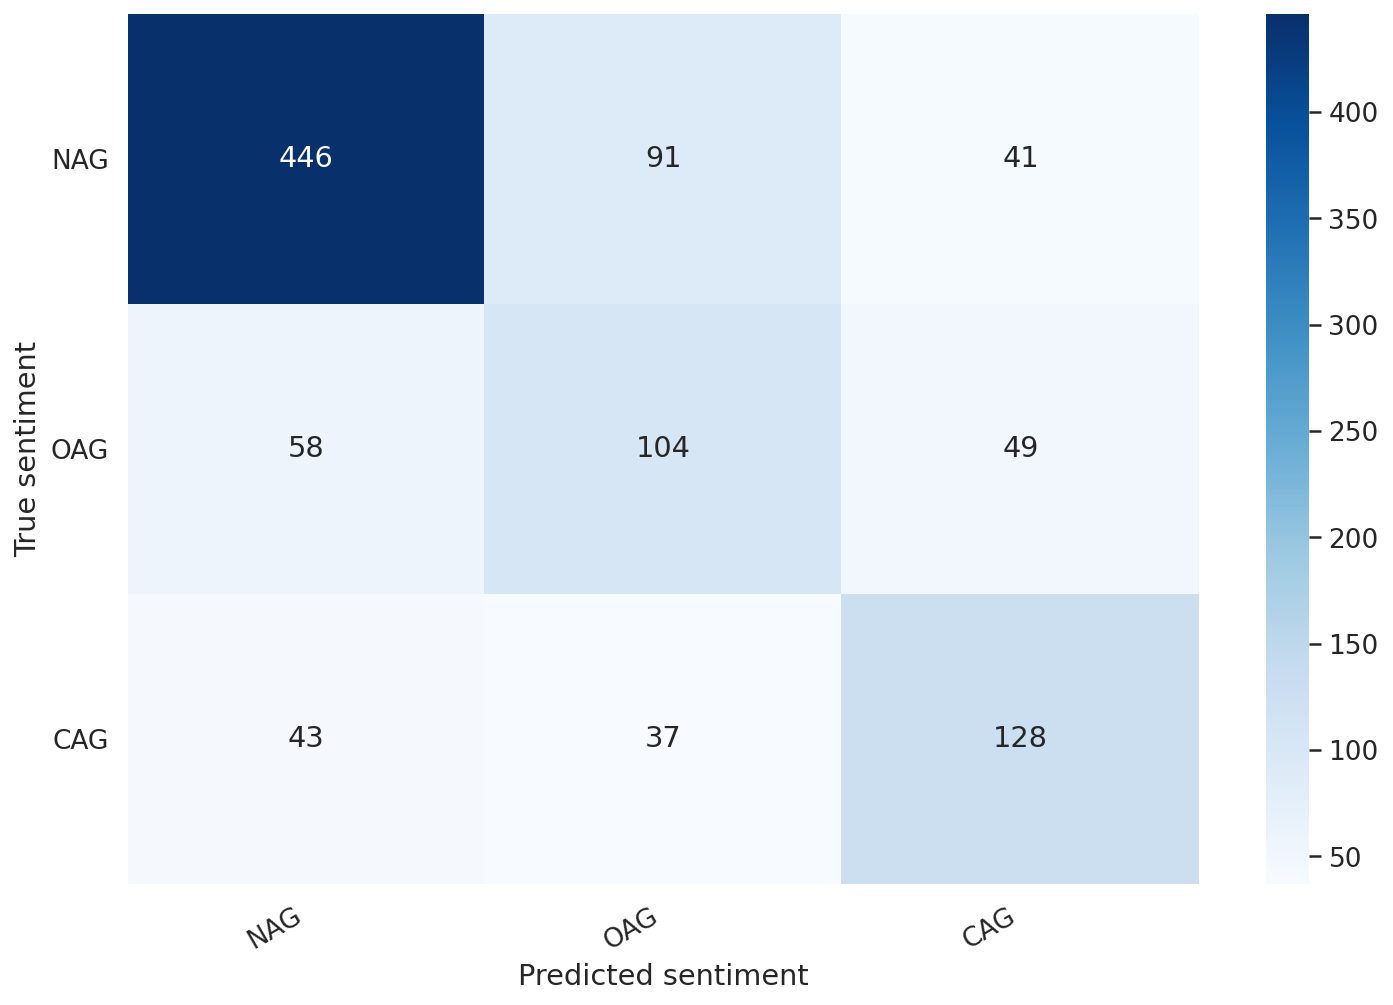

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True sentiment')
  plt.xlabel('Predicted sentiment');
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

In [ ]:
idx = 2
comment_text = y_comment_texts[idx]
true_aggression = y_test[idx]
pred_df = pd.DataFrame({
  'class_names': class_names,
  'values': y_pred_probs[idx]
})

In [ ]:
print("\n".join(wrap(comment_text)))
print()
print(f'True aggression: {class_names[true_aggression]}')

Maine itni kam dislike kbhi nhii dekhi

True sentiment: NAG


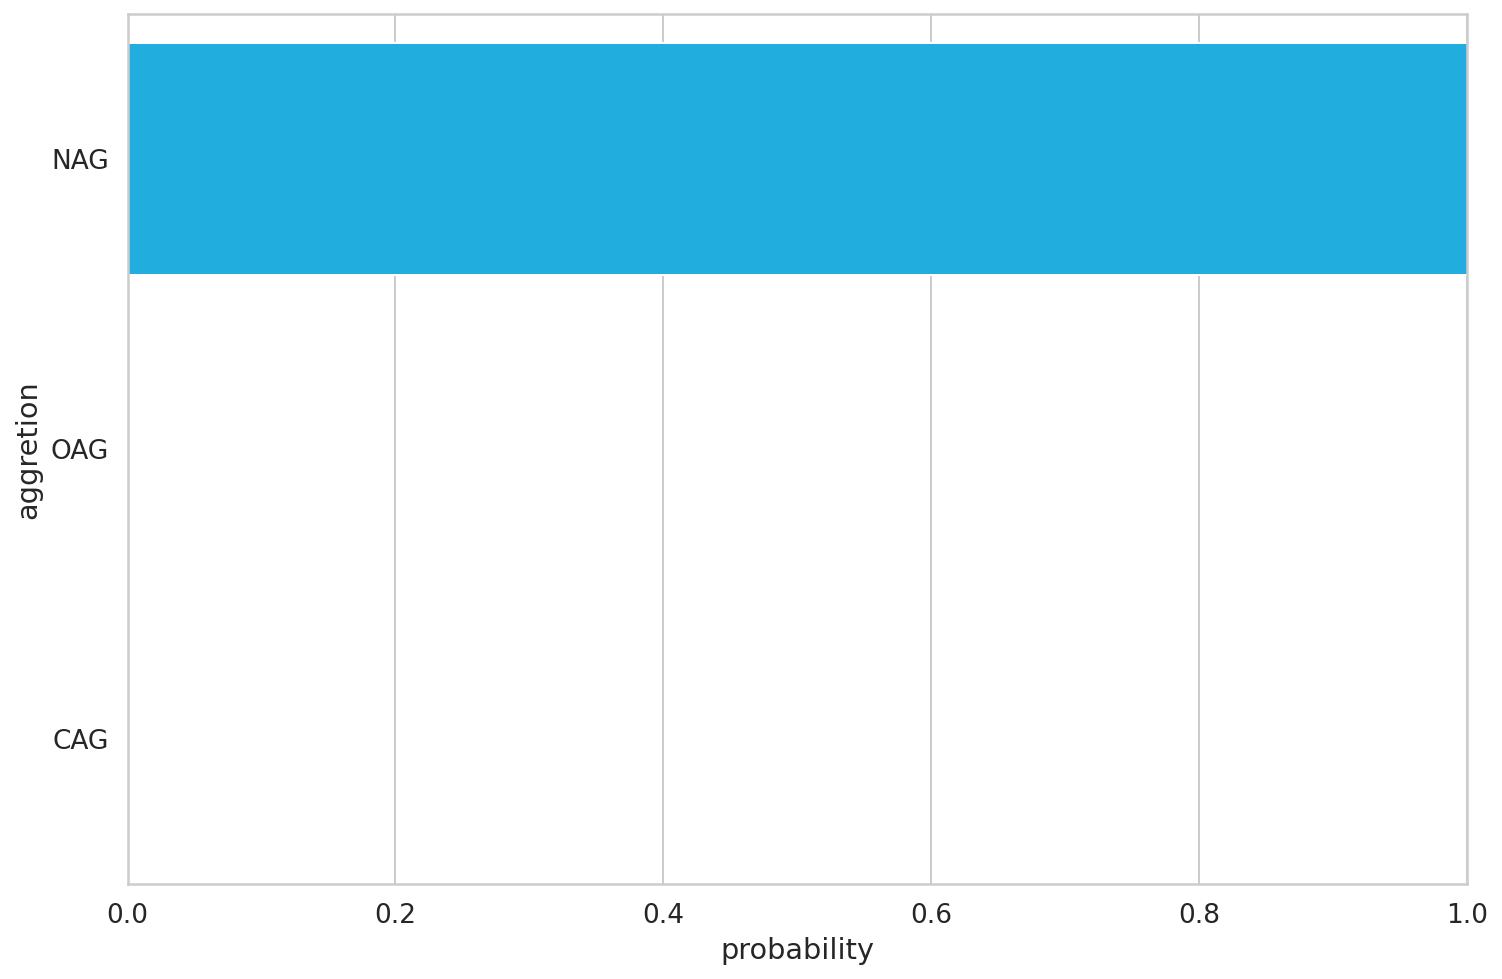

In [ ]:
sns.barplot(x='values', y='class_names', data=pred_df, orient='h')
plt.ylabel('aggretion')
plt.xlabel('probability')
plt.xlim([0, 1]);

In [ ]:
review_text = "chutiya sala, apni ben ko vej de mere pas"

In [ ]:
encoded_review = tokenizer.encode_plus(
  review_text,
  max_length=MAX_LEN,
  add_special_tokens=True,
  return_token_type_ids=False,
  pad_to_max_length=True,
  return_attention_mask=True,
  return_tensors='pt',
)

In [ ]:
input_ids = encoded_review['input_ids'].to(device)
attention_mask = encoded_review['attention_mask'].to(device)
output = model(input_ids, attention_mask)
_, prediction = torch.max(output, dim=1)
print(f'Review text: {review_text}')
print(f'Sentiment  : {class_names[prediction]}')


Review text: chutiya sala, apni ben ko vej de mere pas
Sentiment  : CAG
